In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
dataframe=pd.read_excel('black-line hospital cancer patient dataset.xlsx')
#del dataframe['Patient Id']

#severity=dataframe['Level']
# for i in range(len(severity)):
#     if(severity[i]=='Low'):
#         severity[i]=0
#     elif(severity[i]=='Medium'):
#          severity[i]=1
#     elif(severity[i]=='High'):
#          severity[i]=2
        
# relevance of attribute of dataframe
y=dataframe['Severity']
print(y.shape)
age_level=dataframe['Age'].corr(dataframe['Severity'])
gender_level=dataframe['Gnder'].corr(dataframe['Severity'])
Pollution_level=dataframe['Air Pollution'].corr(dataframe['Severity'])
Alcohol_level=dataframe['Alcohol Usage'].corr(dataframe['Severity'])
dust_level=dataframe['Dust Allergy'].corr(dataframe['Severity'])
hazard_level=dataframe['Risk in occupation'].corr(dataframe['Severity'])
risk_level=dataframe['Genetic Risk'].corr(dataframe['Severity'])
lung_level=dataframe['Lung Disease'].corr(dataframe['Severity'])
diet_level=dataframe['Lack of balanced Diet'].corr(dataframe['Severity'])
obestiy_level=dataframe['Obesity'].corr(dataframe['Severity'])
smoking_level=dataframe['Smoking'].corr(dataframe['Severity'])
smoker_level=dataframe['Passive Smoker'].corr(dataframe['Severity'])
chest_level=dataframe['Chest Pain'].corr(dataframe['Severity'])
blood_level=dataframe['Coughing of Blood'].corr(dataframe['Severity'])
fatigue_level=dataframe['Weariness'].corr(dataframe['Severity'])
print(Pollution_level)
print(Alcohol_level)
print(dust_level)
print(hazard_level)
print(risk_level)
print(lung_level)
print(diet_level)
print(obestiy_level)
print(smoking_level)
print(smoker_level)
print(chest_level)
print(blood_level)
print(fatigue_level)

(1000,)
0.6360384924565833
0.7187103217647227
0.7138387882756939
0.6732548771044919
0.7013027231492885
0.6099713329190285
0.7062730211355581
0.8274350995887051
0.5195301454571831
0.703594416182796
0.6454611826047192
0.782091675264986
0.6251136281446773


In [2]:
#new data frame
#reading from the data frame 
Age=dataframe['Age']
Gender=dataframe['Gnder']
Pollution_level=dataframe['Air Pollution']
Alcohol_level=dataframe['Alcohol Usage']
dust_level=dataframe['Dust Allergy']
hazard_level=dataframe['Risk in occupation']
risk_level=dataframe['Genetic Risk']
lung_level=dataframe['Lung Disease']
diet_level=dataframe['Lack of balanced Diet']
obestiy_level=dataframe['Obesity']
smoking_level=dataframe['Smoking']
smoker_level=dataframe['Passive Smoker']
chest_level=dataframe['Chest Pain']
blood_level=dataframe['Coughing of Blood']
fatigue_level=dataframe['Weariness']
#severity_level=dataframe['Severity']
dataframe=pd.DataFrame({'Age':Age,
                        'Gnder':Gender,
                       'Air Pollution':Pollution_level,
                       'Alcohol Usage':Alcohol_level,
                       'Dust Allergy':dust_level,
                       'Risk in occupation':hazard_level,
                       'Genetic Risk':risk_level,
                       'Lung Disease':lung_level,
                       'Lack of balanced Diet':diet_level,
                       'Obesity':obestiy_level,
                       'Smoking':smoking_level,
                       'Passive Smoker':smoker_level,
                       'Chest Pain':chest_level,
                       'Coughing of Blood':blood_level,
                       'Weariness':fatigue_level,                
                       # 'Severity':severity_level
                       })


In [3]:
print(dataframe.shape)

(1000, 15)


In [3]:
# the correlation between each selected risk factors is 
val=dataframe.corr()
round(val,2)

,Age,Gnder,Air Pollution,Alcohol Usage,Dust Allergy,Risk in occupation,Genetic Risk,Lung Disease,Lack of balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Weariness
Age,1.00,-0.20,0.10,0.15,0.04,0.06,0.07,0.13,0.00,0.03,0.08,0.00,0.01,0.05,0.10
Gnder,-0.20,1.00,-0.25,-0.23,-0.20,-0.19,-0.22,-0.21,-0.10,-0.12,-0.21,-0.18,-0.22,-0.15,-0.12
Air Pollution,0.10,-0.25,1.00,0.75,0.64,0.61,0.71,0.63,0.52,0.60,0.48,0.61,0.59,0.61,0.21
Alcohol Usage,0.15,-0.23,0.75,1.00,0.82,0.88,0.88,0.76,0.65,0.67,0.55,0.59,0.72,0.67,0.24
Dust Allergy,0.04,-0.20,0.64,0.82,1.00,0.84,0.79,0.62,0.65,0.70,0.36,0.56,0.64,0.63,0.33
Risk in occupation,0.06,-0.19,0.61,0.88,0.84,1.00,0.89,0.86,0.69,0.72,0.50,0.56,0.78,0.65,0.27
Genetic Risk,0.07,-0.22,0.71,0.88,0.79,0.89,1.00,0.84,0.68,0.73,0.54,0.61,0.83,0.63,0.23
Lung Disease,0.13,-0.21,0.63,0.76,0.62,0.86,0.84,1.00,0.62,0.60,0.58,0.57,0.78,0.60,0.25
Lack of balanced Diet,0.00,-0.10,0.52,0.65,0.65,0.69,0.68,0.62,1.00,0.71,0.65,0.73,0.80,0.75,0.40
Obesity,0.03,-0.12,0.60,0.67,0.70,0.72,0.73,0.60,0.71,1.00,0.49,0.68,0.67,0.81,0.55


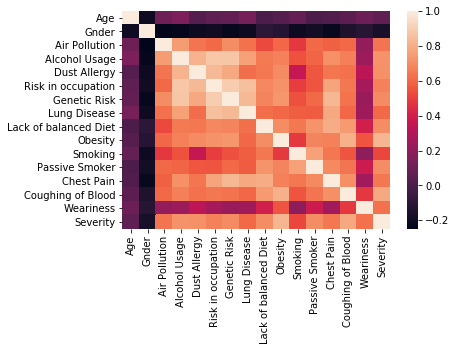

In [5]:
import seaborn as sns
sns.heatmap(val)

In [4]:
X_train,X_test,y_train,y_test=train_test_split(dataframe,y,test_size=0.2)
axis=[]
for h in range(len(y_test)):
    axis.append(h)

In [9]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score
)

Accuracy = 0.895
Precision = 0.9045942667389536
Recall = 0.895


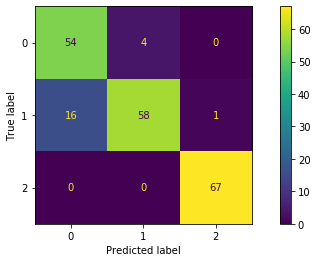

In [31]:
#support vector machine
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy = {accuracy}")
precision = precision_score(y_test, y_pred,average='weighted' )
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Precision = {precision}")
print(f"Recall = {recall}")
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm, X_test, y_test) 
plt.show()

Accuracy = 1.0
Precision = 1.0
Recall = 1.0


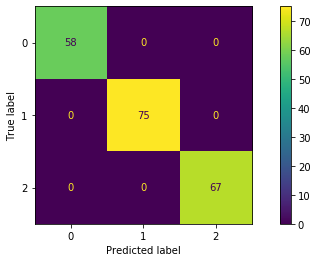

In [32]:
# xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb_clf=XGBClassifier()
xgb_clf.fit(X_train,y_train)
res=xgb_clf.predict(X_test)
#xgb_acc=accuracy_score(y_test,res)
accuracy = accuracy_score(y_test, res)
print(f"Accuracy = {accuracy}")
precision = precision_score(y_test, res,average='weighted' )
recall = recall_score(y_test, res, average='weighted')
print(f"Precision = {precision}")
print(f"Recall = {recall}")
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_clf, X_test, y_test) 
plt.show()

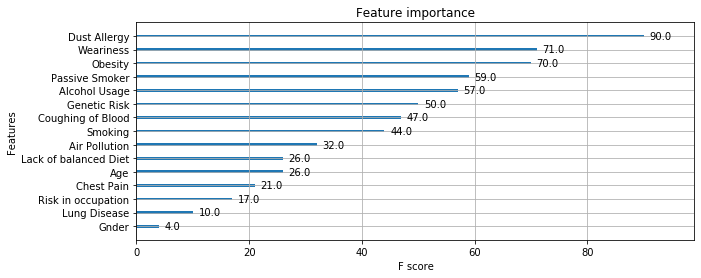

In [33]:
import xgboost as xgb
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [10, 4]
plt.show()

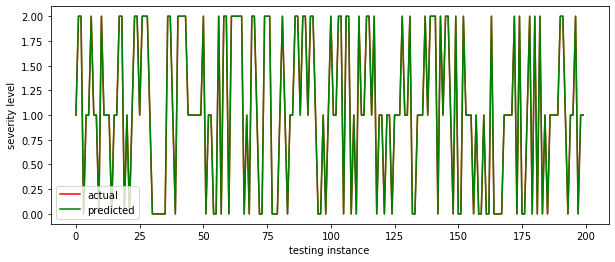

In [9]:
import matplotlib.pyplot as plt
plt.plot(axis,y_test, label="actual", color='r')
plt.plot(axis,res, label="predicted", color='g')
plt.xlabel('testing instance')
plt.ylabel('severity level')
plt.legend()
plt.show()

Accuracy = 0.9
Precision = 0.8998856548856549
Recall = 0.9


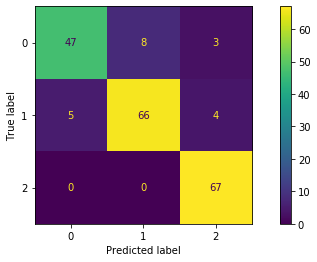

In [29]:
# knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
y_knn=knn.predict(X_test)
accuracy = accuracy_score(y_test, y_knn)
print(f"Accuracy = {accuracy}")
precision = precision_score(y_test, y_knn,average='weighted' )
recall = recall_score(y_test, y_knn, average='weighted')
print(f"Precision = {precision}")
print(f"Recall = {recall}")
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test) 
plt.show()

Accuracy = 0.725
Precision = 0.7838831089351285
Recall = 0.725


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


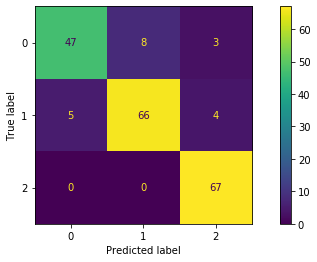

In [34]:
# mlp classifier
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100,20,10), random_state=1,max_iter=15,learning_rate_init=.1)
clf.fit(X_train,y_train)
y_mlp=clf.predict(X_test)
accuracy = accuracy_score(y_test, y_mlp)
print(f"Accuracy = {accuracy}")
precision = precision_score(y_test, y_mlp,average='weighted' )
recall = recall_score(y_test, y_mlp, average='weighted')
print(f"Precision = {precision}")
print(f"Recall = {recall}")
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test) 
plt.show()